Mariana Valenzuela Lafarga

06 de Abril del 2024

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np
import pandas as pd

In [2]:
def montecarlo(f,a,b,N):
    u= np.random.uniform(a,b,N)
    y= f(u)
    return np.mean(y)*(b-a)

In [4]:
def f1(x):
    return np.exp(x)*np.log(x)
def f2(x):
    return np.sin(x)*np.log(x)

In [5]:
a=1
b=3
N=[10,100,1000,10000,100000]
tabla= pd.DataFrame(columns=["F1", "Error1", "F2", "Error2"],index= N)
tabla

,F1,Error1,F2,Error2
10,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN
100000,NaN,NaN,NaN,NaN


In [6]:
for n in N:
    tabla.loc[n,"F1"]=montecarlo(f1,a,b,n)
    tabla.loc[n,"Error1"]=np.abs(14.0275  -tabla.loc[n,"F1"])
    tabla.loc[n,"F2"]=montecarlo(f2,a,b,n)
    tabla.loc[n,"Error2"]=np.abs(0.869844  -tabla.loc[n,"F2"])
    
tabla

,F1,Error1,F2,Error2
10,10.934661,3.092839,0.946472,0.076628
100,14.210937,0.183437,0.836269,0.033575
1000,13.825566,0.201934,0.878177,0.008333
10000,13.911152,0.116348,0.862493,0.007351
100000,14.024114,0.003386,0.867363,0.002481


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [7]:
def montecarlo2(region, ax,bx,ay,by,N):
    X= np.random.uniform(ax,bx,N)
    Y= np.random.uniform(ay,by,N)
    return np.mean(region(X,Y))*((by-ay)*(bx-ax))

In [8]:
def bernoulli(x,y):
    return x**2+ 2*y**2<= -2*x+8*y-7

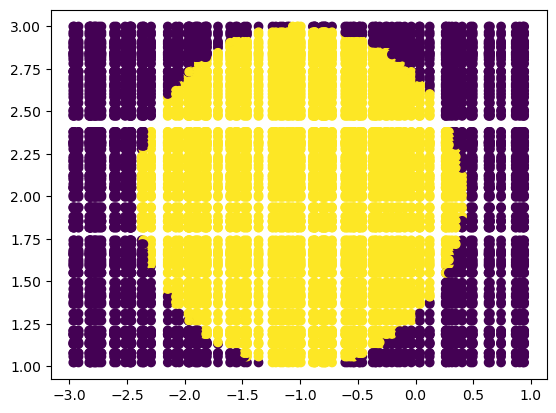

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 100
ax = -3
bx = 1
ay = 1
by = 3
X= np.random.uniform(ax,bx,N)
Y= np.random.uniform(ay,by,N)

X, Y = np.meshgrid(X, Y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))



In [22]:
N=[10,100,1000,10000,100000]
tabla= pd.DataFrame(columns=["Area","Error"],index= N)
tabla

,Area,Error
10,NaN,NaN
100,NaN,NaN
1000,NaN,NaN
10000,NaN,NaN
100000,NaN,NaN


In [26]:
for n in N:
    tabla.loc[n,"Area"]= montecarlo2(bernoulli,ax,bx,ay,by,n)
    tabla.loc[n,"Error"]= np.abs(4.442  -tabla.loc[n,"Area"])
tabla

,Area,Error
10,4.8,0.358
100,4.24,0.202
1000,4.32,0.122
10000,4.4336,0.0084
100000,4.44,0.002


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Valoración de opciones: En la teoría financiera, las opciones se valoran mediante modelos como el Modelo de Black-Scholes o el Modelo Binomial. Estos modelos pueden ser complejos y a veces no tienen soluciones analíticas cerradas. Aquí es donde entra en juego la integración de Montecarlo. Se utilizan simulaciones para generar trayectorias aleatorias del precio del activo subyacente y luego se calcula el valor de la opción al final del período de ejercicio. Repitiendo este proceso muchas veces, se obtiene una estimación del valor de la opción.

Evaluación del riesgo de cartera: La gestión del riesgo es fundamental en finanzas. La integración de Montecarlo se puede utilizar para evaluar el riesgo de una cartera de inversiones mediante la simulación de múltiples escenarios de precios de activos. Esto ayuda a los gestores de cartera a comprender mejor cómo puede variar el valor de su cartera en diferentes condiciones del mercado, lo que les permite tomar decisiones informadas sobre la diversificación y la asignación de activos.

Estimación de precios de activos ilíquidos o difíciles de valorar: En ocasiones, hay activos financieros que son difíciles de valorar debido a su falta de liquidez o a su naturaleza compleja. La integración de Montecarlo puede ser útil en tales casos, ya que permite simular el comportamiento del precio de estos activos en el tiempo, incluso cuando no hay datos históricos disponibles. Esto puede ser especialmente útil en la valoración de activos derivados personalizados o en la valoración de activos alternativos, como bienes raíces o inversiones en capital privado.